In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Descarga los datos de una estación del Servicio Meteorológico Nacional
# http://smn1.conagua.gob.mx/emas/
# Lee un archivo de texto con la función Pandas "read_csv", con elementos separados por mas de 
# un espacio, brincándose 4 renglones del inicio (encabezados)
df0 = pd.read_csv('apatzingan.txt', skiprows=4, sep='\s+')
# "Shift + Enter"

In [3]:
# Lee los primeros 5 renglones del archivo
df0.head(11)
# "Shift+Enter"

,DD/MM/AAAA,HH:MM,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL
0,26/01/2018,17:00,282,286,6.14,12.4,23.8,60,981.8,0.0,455.5
1,26/01/2018,18:00,261,266,6.31,14.3,26.0,50,980.7,0.0,744.7
2,26/01/2018,19:00,242,230,3.49,9.9,29.2,42,979.2,0.0,843.3
3,26/01/2018,20:00,293,283,5.06,13.4,31.2,36,977.6,0.0,792.2
4,26/01/2018,21:00,269,246,4.75,13.4,32.0,32,976.3,0.0,627.2
5,26/01/2018,22:00,206,268,3.16,12.1,32.5,31,975.4,0.0,430.2
6,26/01/2018,23:00,96,130,2.37,7.9,32.0,32,975.2,0.0,197.3
7,27/01/2018,00:00,161,196,1.74,5.8,28.8,44,975.3,0.0,28.0
8,27/01/2018,01:00,66,66,3.84,7.8,24.8,58,975.9,0.0,0.0
9,27/01/2018,02:00,91,66,2.61,9.4,23.5,63,976.4,0.0,0.0


In [4]:
# Dar estructura de datos (DataFrame)
df = pd.DataFrame(df0)

In [5]:
# Ver los tipos de datos que Pandas ha reconocido al leer
df.dtypes

DD/MM/AAAA     object
HH:MM          object
DIRS            int64
DIRR            int64
VELS          float64
VELR          float64
TEMP          float64
HR              int64
PB            float64
PREC          float64
RADSOL        float64
dtype: object

In [6]:
# Combinar las columnas "DD/MM/AAAA" con "HH:MM" y convertirla a variable de tiempo
# Se crea una nueva columna "Fecha" al final con formato de tiempo.
# Eliminamos las dos primeras columnas que ya no necesitaremos
df['FECHA'] = pd.to_datetime(df.apply(lambda x: x['DD/MM/AAAA'] + ' ' + x['HH:MM'], 1), dayfirst=True)
df = df.drop(['DD/MM/AAAA', 'HH:MM'], 1)

In [7]:
df.head()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,FECHA
0,282,286,6.14,12.4,23.8,60,981.8,0.0,455.5,2018-01-26 17:00:00
1,261,266,6.31,14.3,26.0,50,980.7,0.0,744.7,2018-01-26 18:00:00
2,242,230,3.49,9.9,29.2,42,979.2,0.0,843.3,2018-01-26 19:00:00
3,293,283,5.06,13.4,31.2,36,977.6,0.0,792.2,2018-01-26 20:00:00
4,269,246,4.75,13.4,32.0,32,976.3,0.0,627.2,2018-01-26 21:00:00


In [8]:
# Realiza un análisis exploratorio de datos
df.describe()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,183.012195,173.792683,3.629817,9.166463,23.479268,54.048780,978.161585,0.001220,158.832317
std,104.486650,107.846487,4.123596,3.914364,4.499945,15.511644,2.192833,0.015617,251.514954
min,1.000000,0.000000,0.120000,3.900000,16.400000,27.000000,972.800000,0.000000,0.000000
25%,88.500000,80.000000,1.830000,6.300000,19.900000,40.750000,976.500000,0.000000,0.000000
50%,199.500000,188.500000,3.100000,8.150000,23.050000,54.000000,978.500000,0.000000,0.000000
75%,272.000000,266.250000,4.187500,11.425000,25.825000,68.000000,979.600000,0.000000,213.100000
max,355.000000,359.000000,42.870000,25.600000,34.500000,88.000000,983.100000,0.200000,843.500000


In [9]:
# Selecciona los renglones con Temperatura > 24ºC y < 25ºC
df_tmp = df[df.TEMP > 24] 
df_select = df_tmp[df_tmp.TEMP < 25]
df_select

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,FECHA
8,66,66,3.84,7.8,24.8,58,975.9,0.0,0.0,2018-01-27 01:00:00
34,323,304,1.93,9.8,24.3,60,975.5,0.0,0.0,2018-01-28 03:00:00
60,124,248,3.51,9.6,24.2,54,976.6,0.0,0.0,2018-01-29 05:00:00
72,246,256,3.82,7.0,24.4,56,980.2,0.0,227.8,2018-01-29 17:00:00
80,118,110,3.52,6.3,24.5,54,976.5,0.0,0.0,2018-01-30 01:00:00
81,107,94,4.24,8.4,24.1,52,977.6,0.0,0.0,2018-01-30 02:00:00
95,261,227,4.61,14.0,24.2,36,981.2,0.0,415.7,2018-01-30 16:00:00
102,231,230,2.20,9.4,24.3,42,977.8,0.0,63.8,2018-01-30 23:00:00
121,259,188,6.15,16.4,24.2,35,981.5,0.0,364.7,2018-01-31 18:00:00
143,258,264,7.57,16.3,24.5,44,981.9,0.0,540.2,2018-02-01 16:00:00


In [10]:
# Calcula el promedio de las columnas, excepto en la FECHA (que no tendría sentido)
df.mean()

DIRS      183.012195
DIRR      173.792683
VELS        3.629817
VELR        9.166463
TEMP       23.479268
HR         54.048780
PB        978.161585
PREC        0.001220
RADSOL    158.832317
dtype: float64

In [11]:
# Calcula el promedio de las Temperaturas
df.TEMP.mean()

23.479268292682928

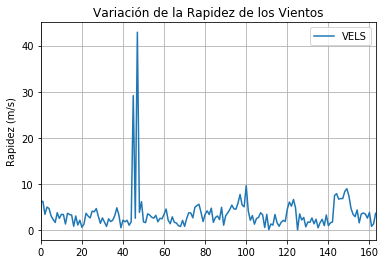

In [12]:
# Gráfica de la rapidez de los vientos (m/s) 
plt.figure(); df.VELS.plot(); plt.legend(loc='best')
plt.title("Variación de la Rapidez de los Vientos")
plt.ylabel("Rapidez (m/s)")
plt.grid(True)
plt.show()


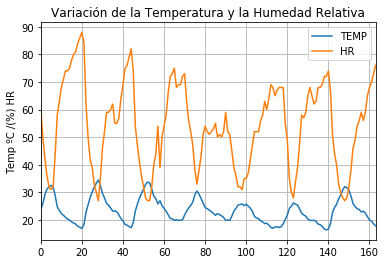

In [13]:
# Gráfica de Temperatura y Humedad Relativa
df1 = df[['TEMP','HR']]
plt.figure(); df1.plot(); plt.legend(loc='best')
plt.title("Variación de la Temperatura y la Humedad Relativa")
plt.ylabel("Temp ºC /(%) HR")
plt.grid(True)
plt.show()

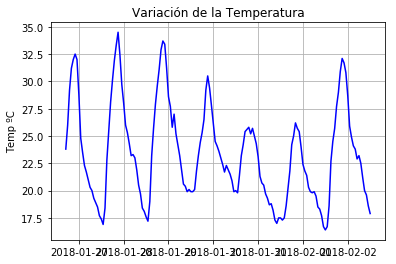

In [14]:
plt.plot_date(x=df.FECHA, y=df.TEMP, fmt="b-")
plt.title("Variación de la Temperatura")
plt.ylabel("Temp ºC")
plt.grid(True)
plt.show()

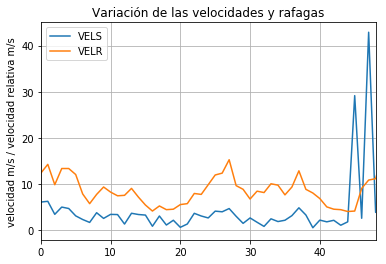

In [15]:
# Gráfica de velocidades de viento y rafaga
df1 = df[['VELS','VELR']]
plt.figure(); df1.plot(); plt.legend(loc='best')
plt.title("Variación de las velocidades y rafagas")
plt.ylabel("velocidad m/s / velocidad relativa m/s")
plt.xlim(0,48)
plt.grid(True)
plt.show()

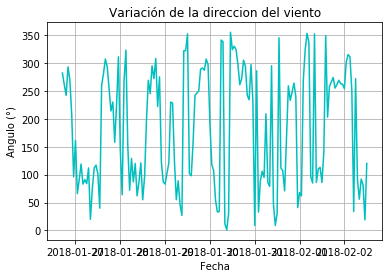

In [16]:
#Gráfica de la direccion del viento
plt.plot_date(x=df.FECHA, y=df.DIRS, fmt="c-")
plt.title("Variación de la direccion del viento")
plt.ylabel("Angulo (°)")
plt.xlabel("Fecha")
plt.grid(True)
plt.show()

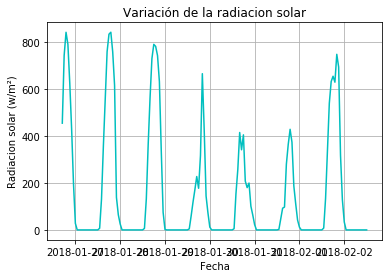

In [17]:
#Gráfica de la radiación solar
plt.plot_date(x=df.FECHA, y=df.RADSOL, fmt="c-")
plt.title("Variación de la radiacion solar")
plt.ylabel("Radiacion solar (w/m²)")
plt.xlabel("Fecha")
plt.grid(True)
plt.show()

In [18]:
df2=df.loc[8:40,["TEMP","FECHA"]]27/01/2018 00:00   

In [19]:
tmin=df2.min()

In [20]:
tmax=df2.max()

In [21]:
tmax-tmin

TEMP                17.6
FECHA    1 days 08:00:00
dtype: object

In [22]:
df.describe()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,183.012195,173.792683,3.629817,9.166463,23.479268,54.048780,978.161585,0.001220,158.832317
std,104.486650,107.846487,4.123596,3.914364,4.499945,15.511644,2.192833,0.015617,251.514954
min,1.000000,0.000000,0.120000,3.900000,16.400000,27.000000,972.800000,0.000000,0.000000
25%,88.500000,80.000000,1.830000,6.300000,19.900000,40.750000,976.500000,0.000000,0.000000
50%,199.500000,188.500000,3.100000,8.150000,23.050000,54.000000,978.500000,0.000000,0.000000
75%,272.000000,266.250000,4.187500,11.425000,25.825000,68.000000,979.600000,0.000000,213.100000
max,355.000000,359.000000,42.870000,25.600000,34.500000,88.000000,983.100000,0.200000,843.500000
